# Linear Regression with NNs - from raw Python through TF to Keras

## Linear regression

Linear regression is just line fitting in short. We have a bunch of data points, ploted on a 2D cartesian plane (in simplest case, single variate LR case). Let's generate some data like that - we will represent house price dependency on the size of the flat. 

<font color='red'>Note: </font> this example is only used because we are learning the fundamentals of DL. We will use this example to transition from raw python NeuralNets to frameworks we will use in latter parts of the couse.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

num_house = 160
np.random.seed(42)

#  generation some house sizes between 100 and 400 m^2 (typical lithuanian houses)
house_sizes = np.random.randint(low=100, high=400, size=num_house)

# Generate house prices from house size with a random noise added.
house_prices = house_sizes * 300.0 + np.random.randint(low=3000, high=30000, size=num_house)  

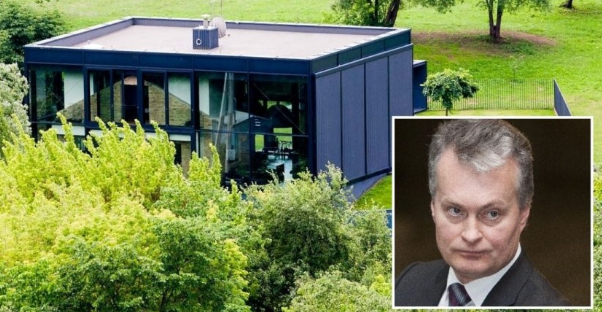



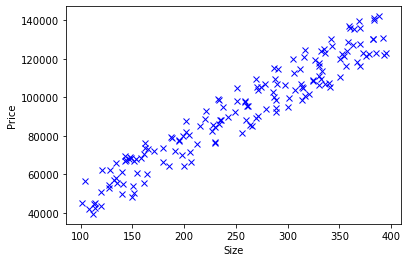

In [2]:
# Plot generated house and size 
plt.plot(house_sizes, house_prices, "bx")  # bx = blue x, can use r, g, y, etc.
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [3]:
# we will use zip() function for pairing if we have [a, b] and [c, d] zip will create [(a, c), (b, d)]
# you can use simple experiments in jdoole, for example to understand zip():
# a = ["a", "b"]
# b = ["c", "d"]
# print(list(zip(a, b)))

print(list(zip(house_sizes, house_prices)))

[(202, 81837.0), (370, 127808.0), (206, 71385.0), (171, 71975.0), (288, 109365.0), (120, 50649.0), (202, 87538.0), (221, 92964.0), (314, 98836.0), (187, 79180.0), (199, 79782.0), (251, 105036.0), (230, 76737.0), (249, 92255.0), (357, 123977.0), (393, 121754.0), (291, 114848.0), (376, 121655.0), (260, 88392.0), (121, 62212.0), (352, 122549.0), (335, 125133.0), (148, 68956.0), (158, 68491.0), (269, 89491.0), (287, 115409.0), (370, 135919.0), (289, 94631.0), (274, 105094.0), (150, 48202.0), (154, 60647.0), (343, 126502.0), (230, 84688.0), (234, 98542.0), (120, 43389.0), (266, 85127.0), (373, 122904.0), (188, 78715.0), (113, 44677.0), (341, 105497.0), (364, 135709.0), (152, 50530.0), (191, 72074.0), (363, 126987.0), (134, 65871.0), (305, 119684.0), (180, 66339.0), (149, 68366.0), (101, 44889.0), (153, 67795.0), (205, 80208.0), (359, 137070.0), (290, 107043.0), (317, 100911.0), (143, 69382.0), (261, 95543.0), (301, 99846.0), (369, 139645.0), (370, 115986.0), (314, 105538.0), (351, 119711.0)

## Solving linear regression with simplest NN

How will our NN look like for linear regression of one variable? Well we are modeling the equation: y = mx + b, where m is the slope, x is the input, b is the offset. Let's get back to the slides to understand the Neural Network that can solve Linear Regression.

### Bias

The slides contain a discussion on the bias

### Linear Regression and Learning rate

Let's define a training loop containing the formula y = mx + b. The error calculation and the weight updates - the same like we had with the classification example. The only difference is the introduction of the bias term (which we discussed) and the learning rate. What is the learning rate?

Let's get back the to the slides to discuss it.

After discussing the learning rate, let's return to running the code.

In [3]:
weight = 500
bias = 2
learning_rate = 0.01

# training loop
for i in range(len(house_sizes)):
    prediction = house_sizes[i] * weight + bias # mx+b
    print("price[" + str(i) + "]: " + str(house_prices[i]) + " ;; pred: " + str(prediction) + " ;; error: " + str(house_prices[i] - prediction))
    error = prediction - house_prices[i]
    weight = weight - learning_rate * error * house_sizes[i] # weight adjustments
    bias = bias - learning_rate * error # we don't need to multiply error by the input house_sizes[i], because the bias is not dependent on it, like the weight was

price[0]: 81837.0 ;; pred: 101002 ;; error: -19165.0
price[1]: 127808.0 ;; pred: -14139110.650000002 ;; error: 14266918.650000002
price[2]: 71385.0 ;; pred: 10866515934.766504 ;; error: -10866444549.766504
price[3]: 71975.0 ;; pred: -3818902134111.155 ;; error: 3818902206086.155
price[4]: 109365.0 ;; pred: 1874339386554002.0 ;; error: -1874339386444637.0
price[5]: 50649.0 ;; pred: -6.470094383911085e+17 ;; error: 6.470094383911592e+17
price[6]: 87538.0 ;; pred: 1.5575243818774e+20 ;; error: -1.557524381877399e+20
price[7]: 92964.0 ;; pred: -6.936215916696907e+22 ;; error: 6.936215916696907e+22
price[8]: 98836.0 ;; pred: 4.803532024654877e+25 ;; error: -4.803532024654877e+25
price[9]: 79180.0 ;; pred: -2.817725239372683e+28 ;; error: 2.817725239372683e+28
price[10]: 79782.0 ;; pred: 1.0455897318259162e+31 ;; error: -1.0455897318259162e+31
price[11]: 105036.0 ;; pred: -5.209532692381736e+33 ;; error: 5.209532692381736e+33
price[12]: 76737.0 ;; pred: 3.0027416345389836e+36 ;; error: -3.00

<ipython-input-3-94f1923e81ab>:7: RuntimeWarning: overflow encountered in multiply
  prediction = house_sizes[i] * weight + bias # mx+b
<ipython-input-3-94f1923e81ab>:10: RuntimeWarning: invalid value encountered in double_scalars
  weight = weight - learning_rate * error * house_sizes[i] # weight adjustments
<ipython-input-3-94f1923e81ab>:11: RuntimeWarning: invalid value encountered in double_scalars
  bias = bias - learning_rate * error # we don't need to multiply error by the input house_sizes[i], because the bias is not dependent on it, like the weight was


As you can see the bias and the weight go to infinity. The neural network does not converge, it diverges. Why is that? 

- The error is not big at the beggining when the weight and the bias is reasonable
- Once we calcualte the first error, it is off by much and since we are multiplying it by the inputs (in case of weight adjustment) it becomes bigger
- Then the error just becomes increasingly divergent, point of no return is reached, the chain reaction becomes uncontrollable

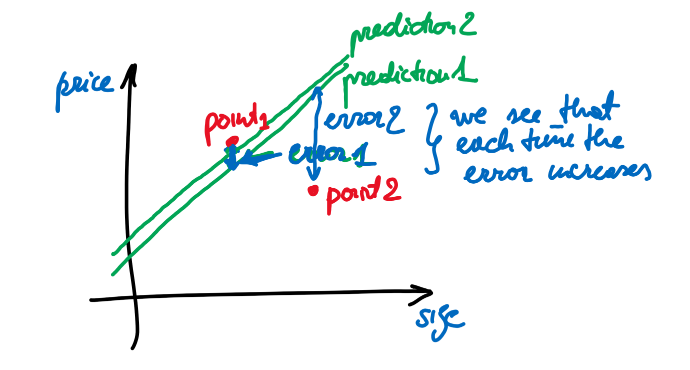


Our network does not converge, it actually diverges. Let's introduce some additional concepts that might help to create a LinerRegressor NN (we will also use these concepts in the future).

## Data / Feature Normalization

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges (different by 2 or more orders of magnitude (10x, 100x, etc.). 

Normalization can be summarized with the following slogan: **keep the same relative differences the same but, decrease the absolute value** . We can also express the same notion as mapping: map the unbounded feature sized to some bounded domain (e.g. [800, 4056] --> [-2, 2] )

In [4]:
def normalize(arr):
#     print(arr.mean())
#     print(arr - arr.mean())
#     print(arr.std())
    return (arr - arr.mean()) / arr.std()

To be completelly technically correct, this is called standartization, however standartization and normalization are ussually refered to by the same one name - normalization.

In [5]:
house_sizes_norm = normalize(house_sizes)
house_prices_norm = normalize(house_prices)

# Let's compare original house prices to the normalized ones
# for n in list(zip(house_sizes, house_sizes_norm)):
#     print(n)

# for n in list(zip(house_prices, house_prices_norm)):
#     print(n)

# TODO :: add a more graphical comparison

In [6]:
weight = 0.1
bias = 0.1
learning_rate = 0.01
errors = []

# training loop
for i in range(len(house_sizes_norm)):
    prediction = house_sizes_norm[i] * weight + bias
    error = prediction - house_prices_norm[i]
    errors.append(abs(round(error, 2)))
    print("error: " + str(abs(round(error, 2))))
    weight = weight - learning_rate * error * house_sizes_norm[i]
    bias = bias - learning_rate * error

error: 0.45
error: 1.1
error: 0.85
error: 0.77
error: 0.49
error: 1.49
error: 0.18
error: 0.01
error: 0.04
error: 0.47
error: 0.46
error: 0.4
error: 0.64
error: 0.08
error: 0.92
error: 0.74
error: 0.68
error: 0.74
error: 0.28
error: 0.94
error: 0.8
error: 0.93
error: 0.72
error: 0.75
error: 0.26
error: 0.68
error: 1.21
error: 0.14
error: 0.3
error: 1.47
error: 0.98
error: 0.89
error: 0.31
error: 0.21
error: 1.48
error: 0.41
error: 0.62
error: 0.35
error: 1.34
error: 0.05
error: 1.1
error: 1.22
error: 0.55
error: 0.74
error: 0.51
error: 0.72
error: 0.7
error: 0.46
error: 1.1
error: 0.46
error: 0.25
error: 1.09
error: 0.3
error: 0.08
error: 0.32
error: 0.02
error: 0.03
error: 1.1
error: 0.16
error: 0.09
error: 0.41
error: 0.27
error: 0.28
error: 0.44
error: 0.04
error: 0.61
error: 0.44
error: 0.31
error: 0.62
error: 0.01
error: 0.01
error: 1.01
error: 0.5
error: 0.98
error: 0.7
error: 1.01
error: 0.13
error: 0.08
error: 0.14
error: 0.16
error: 0.26
error: 0.03
error: 0.93
error: 0.87
err

We can clearly see that the error becomes smaller and smaller.

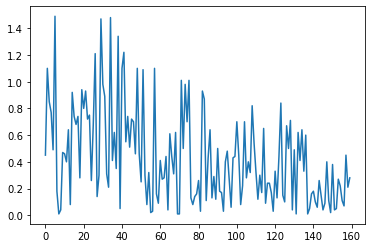

In [7]:
plt.plot(errors)

Feature normalization / stadartization is important for several reasons: 
- it enables convergence - sometimes, as we saw the network diverges w/o it.
- the training / convergence is faster
- gradient descent is much more efficient when data is normalized (we will talk about why that is in the future)

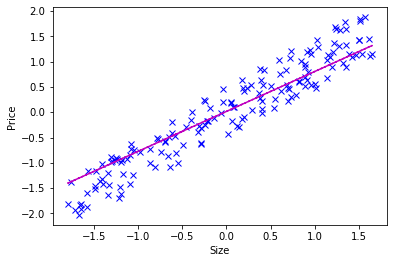

In [14]:
plt.plot(house_sizes_norm, house_prices_norm, "bx")  # bx = blue x
# plot the predicted line
plt.plot(house_sizes_norm, weight * house_sizes_norm + bias, '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## I see a bunch of equations - but where is the perceptron?

A neural network is just a bunch of operations (summations and activations for now, letter we will see more) chained together. You can represent them via procedural code or object oriented code. Thus far we used procedural code and the logical model we should have can be represented as this:

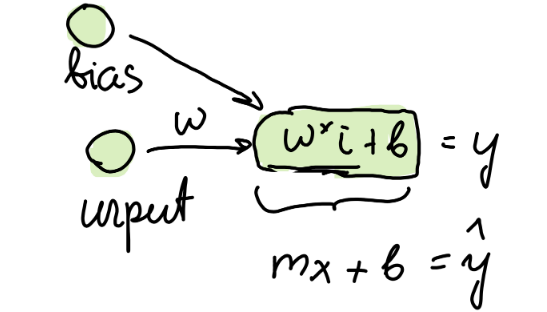

## Introducing the notion of batching

https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

In [ ]:
weight = 0.1
bias = 0.1
batch_size = 10

# Test data batching
# print(range(0, len(house_sizes_norm), batch_size))
# print(house_sizes_norm[0:].shape)
# for i in range(0, len(house_sizes_norm), batch_size):
#     print(str(i) + "->" + str(house_sizes_norm[i:i+batch_size].shape))

# training loop
for i in range(0, len(house_sizes_norm), batch_size):
    prediction = house_sizes_norm[i:i+batch_size] * weight + bias
    # need to use advanced error functions (like MSE) and gradient descent - simple difference is not sufficient

## Introducing the notion of epoch

What is an epoch? Let's turn to the slides for that.

### Implementing epochs in a simple NN

Let's add more passes through the entire dataset to see if our error term is further minimized: 

In [7]:
weight = 0.1
bias = 0.1
learning_rate = 0.01
errors = []

for j in range(10):
    for i in range(len(house_sizes_norm)):
        prediction = house_sizes_norm[i] * weight + bias
        error = prediction - house_prices_norm[i]
        errors.append(abs(round(error, 2)))
        print("error: " + str(abs(round(error, 2))))
        # print("price[" + str(i) + "]: " + str(house_prices_norm[i]) + " ;; pred: " + str(prediction) + " ;; error: " + str(house_prices_norm[i] - prediction))
        weight = weight - learning_rate * error * house_sizes_norm[i]
        bias = bias - learning_rate * error

error: 0.45
error: 1.1
error: 0.85
error: 0.77
error: 0.49
error: 1.49
error: 0.18
error: 0.01
error: 0.04
error: 0.47
error: 0.46
error: 0.4
error: 0.64
error: 0.08
error: 0.92
error: 0.74
error: 0.68
error: 0.74
error: 0.28
error: 0.94
error: 0.8
error: 0.93
error: 0.72
error: 0.75
error: 0.26
error: 0.68
error: 1.21
error: 0.14
error: 0.3
error: 1.47
error: 0.98
error: 0.89
error: 0.31
error: 0.21
error: 1.48
error: 0.41
error: 0.62
error: 0.35
error: 1.34
error: 0.05
error: 1.1
error: 1.22
error: 0.55
error: 0.74
error: 0.51
error: 0.72
error: 0.7
error: 0.46
error: 1.1
error: 0.46
error: 0.25
error: 1.09
error: 0.3
error: 0.08
error: 0.32
error: 0.02
error: 0.03
error: 1.1
error: 0.16
error: 0.09
error: 0.41
error: 0.27
error: 0.28
error: 0.44
error: 0.04
error: 0.61
error: 0.44
error: 0.31
error: 0.62
error: 0.01
error: 0.01
error: 1.01
error: 0.5
error: 0.98
error: 0.7
error: 1.01
error: 0.13
error: 0.08
error: 0.14
error: 0.16
error: 0.26
error: 0.03
error: 0.93
error: 0.87
err

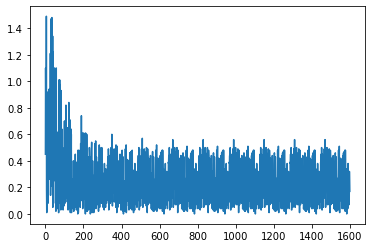

In [8]:
plt.plot(errors)

We do see a minimization of error. From this we can see that we don't even need 20 epochs to reach the optimal model. Now, let's plot it and see if we achived a better fit.

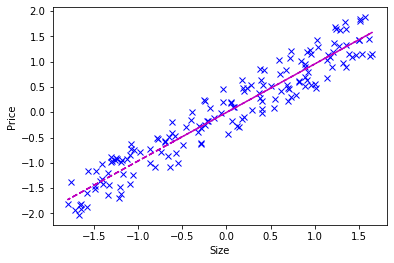

0.9601021809170335
-0.0056278746054749754


In [9]:
plt.plot(house_sizes_norm, house_prices_norm, "bx")  # bx = blue x
# plot the predicted line
plt.plot(house_sizes_norm, weight * house_sizes_norm + bias, '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

print(weight)
print(bias)

## Denormalization
To predict on real world values, we need to denormalize the data durring the time of prediction. If you know about normalization by now, you might know that, for example scikit learn framework has the tools to normalized and denormalize data. 
https://stackoverflow.com/questions/49696981/keras-using-predict-with-a-model-trained-with-normalized-data

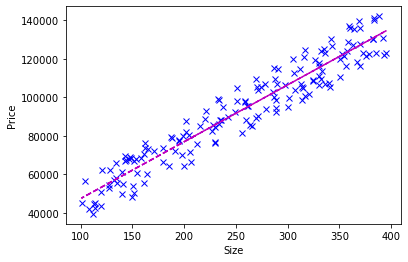

In [10]:
house_sizes_mean = house_sizes.mean()
house_sizes_std = house_sizes.std()

house_prices_mean = house_prices.mean()
house_prices_std = house_prices.std()

plt.plot(house_sizes, house_prices, "bx")  # bx = blue x
# plot the predicted line
# Reverse of normalization (house_sizes - house_sizes.mean()) / house_sizes.std()
plt.plot(house_sizes_norm * house_sizes_std + house_sizes_mean, (weight * house_sizes_norm - bias) * house_prices_std + house_prices_mean , '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## We followed these steps when training our model
- Data preparation 
- Model definition and forward pass
- Loss calculation
- Weight and bias opimization

## Introducing Tensorflow

First, let's switch to slides for some Tensorflow theory and simple demos to understand what tensorflow is.

### Test / train data spliting

We already know that we need to split our data into training set and a test set. The training set is often 70% of the data and test set is ofter 30%. We will use this concept often from now on.

In [ ]:
import tensorflow as tf

# define number of training samples, 0.7 = 70%.  
# We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_sizes[:num_train_samples])
train_price = np.asanyarray(house_prices[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_sizes[num_train_samples:])
test_house_price = np.array(house_prices[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

#  Variables that get updated as we descend down the gradient
tf_house_size = 0.0 
tf_price = 0.0

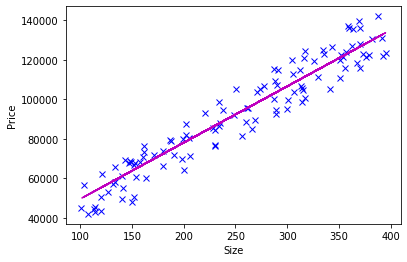

Epoch count 79: Loss value: 0.08000367134809494


In [ ]:
class LinearModel:
    def __call__(self, x):
        # 2. Define the operations for the predicting values. We are using the TF API for addition and mult
        return tf.add(tf.multiply(self.Weight, x), self.Bias) # could use: self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

def loss(y, pred): 
    # 3. Define the Loss Function RMSE 
    return tf.reduce_mean(tf.square(y - pred))

# Optimizer learning rate.  The size of the steps down the gradient
def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    # 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)


linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(train_price_norm, linear_model(train_house_size_norm))
    train(linear_model, train_house_size_norm, train_price_norm, lr=0.11)
#     print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
    
# plot
train_house_size_mean = train_house_size.mean()
train_house_size_std = train_house_size.std()

train_price_mean = house_prices.mean()
train_price_std = house_prices.std()

plt.plot(train_house_size, train_price, "bx")  # bx = blue x
# plot the predicted line
plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean, linear_model(train_house_size_norm) * train_price_std + train_price_mean , '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

# predict
print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

What do we see here:
- tf.add()
- tf.multiply()
- tf.Variable()
- tf.reduce_mean()
- tf.square()
- tf.GradientTape()
- t.gradient()

### GradientTape and gradient

Tensorflow provides both the Gradient API and the automatic differentiation feature (autodiff). So the gradient descent process is implemented for us by the framework.


To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.


## Solving Linear Regression w/ Estimators

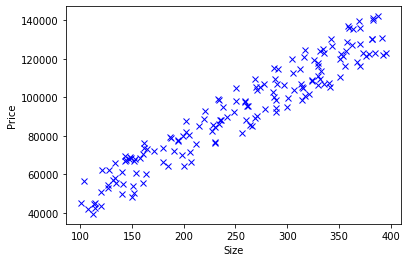

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf

!rm -rf ./tmp


num_house = 160
np.random.seed(42)
house_sizes = np.random.randint(low=100, high=400, size=num_house)
house_prices = house_sizes * 300.0 + np.random.randint(low=3000, high=30000, size=num_house)  

# tf.get_logger().setLevel('ERROR')

plt.plot(house_sizes, house_prices, "bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [2]:
def normalize(arr):
    return (arr - arr.mean()) / arr.std()

# define number of training samples, 0.7 = 70%.  
num_train_samples = math.floor(num_house * 0.7)

train_house_size = np.asarray(house_sizes[:num_train_samples])
train_price = np.asanyarray(house_prices[:num_train_samples:])
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_sizes[num_train_samples:])
test_house_price = np.array(house_prices[num_train_samples:])
test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

featcols = [
    tf.feature_column.numeric_column("size")
]

# conf = tf.estimator.RunConfig(
#     model_dir="./tmp/",
#     keep_checkpoint_max=1,
#     log_step_count_steps=1000,
#     save_summary_steps=10,
#     save_checkpoints_secs=10)
# model = tf.estimator.LinearRegressor(feature_columns=featcols, config=conf)

model = tf.estimator.LinearRegressor(feature_columns=featcols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpq_fp_s90', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [3]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_house_size_norm, train_price_norm))
def input_fn_train():
  dataset = tf.data.Dataset.from_tensor_slices(({"size": train_house_size_norm}, train_price_norm))
  return dataset.repeat(1).batch(1)

model.train(input_fn=input_fn_train, steps=30)

# INFO:tensorflow:loss = 0.6096047, step = 0 ---> how can the loss be so low at first step? It's actually huge, remember we use normalized data!

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

... Again, training on denormalized data would take for ever or diverge ...
<pre>
INFO:tensorflow:global_step/sec: 1354.96
INFO:tensorflow:loss = 3059303200.0, step = 179800 (0.074 sec)
INFO:tensorflow:global_step/sec: 1412.22
INFO:tensorflow:loss = 3058204000.0, step = 179900 (0.072 sec)
INFO:tensorflow:global_step/sec: 1354.96
INFO:tensorflow:loss = 3057105000.0, step = 180000 (0.074 sec)
INFO:tensorflow:global_step/sec: 1373.52
INFO:tensorflow:loss = 3056007400.0, step = 180100 (0.072 sec)
</pre>

In [4]:
import tensorflow as tf
# ATTENTION: if you are running on the GPU you might see an error:
# InternalError:  Blas GEMV launch failed:  m=2, n=32

# Fix it using: set_memory_growth to true
# physical_devices = tf.config.list_physical_devices('GPU') 
# print(tf.config.list_physical_devices('GPU'))
# print(tf.config.list_physical_devices('CPU'))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

<pre>
Wed Jul 15 06:35:10 2020
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.40       Driver Version: 431.40       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8     3W /  N/A |   6130MiB /  6144MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU       PID   Type   Process name                             Usage      |
|=============================================================================|
|    0     15216      C   ...rogram Files\Python\Python38\python.exe N/A      |
|    0     18916      C   ...rogram Files\Python\Python38\python.exe N/A      |
+-----------------------------------------------------------------------------+
WARNING: infoROM is corrupted at gpu 0000:01:00.0
</pre>

15216 - was acting up

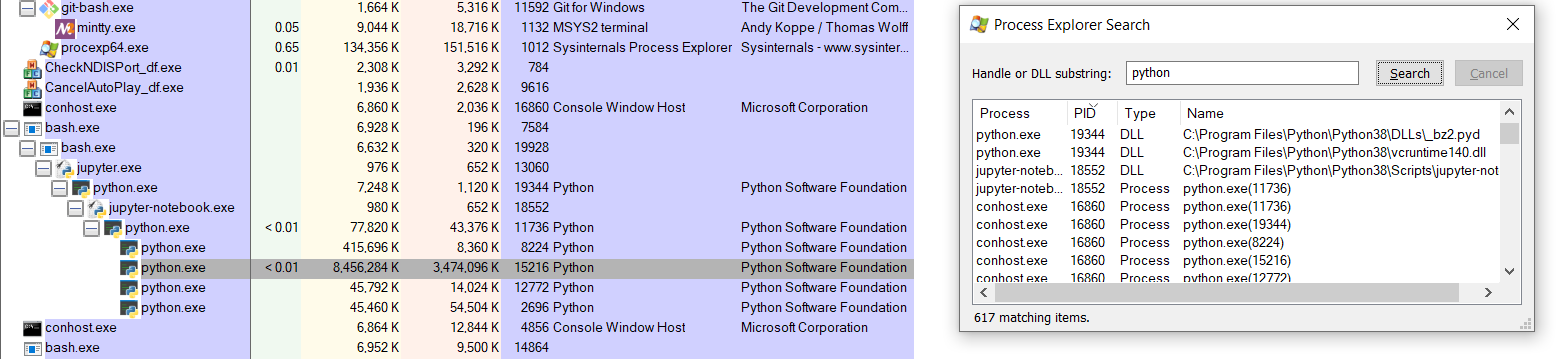

In [5]:
def input_fn_predict():
    data = tf.data.Dataset.from_tensor_slices(({"size": test_house_size_norm}))
    return data.repeat(1).batch(1) 

predictions = model.predict(input_fn=input_fn_predict)

# persist the generator to list
predictions_list = np.array(list([x['predictions'][0] for x in predictions]))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpq_fp_s90/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [8]:
for f, b in zip(predictions_list, test_house_price):
    print(str(round(f * train_price.std() + train_price.mean())) + "-->" + str(b))

115165.0-->117586.0
118262.0-->107557.0
59729.0-->53892.0
73356.0-->77982.0
112378.0-->101500.0
115165.0-->116172.0
117024.0-->106761.0
87912.0-->89807.0
96583.0-->105357.0
52606.0-->62217.0
54774.0-->55469.0
47650.0-->39469.0
93177.0-->98040.0
101538.0-->102792.0
118882.0-->130336.0
70259.0-->64199.0
131580.0-->141228.0
64065.0-->73377.0
96274.0-->109576.0
57561.0-->67495.0
62826.0-->55287.0
85124.0-->99003.0
131580.0-->140299.0
52296.0-->54546.0
77072.0-->66318.0
57251.0-->66780.0
132199.0-->123235.0
83266.0-->82396.0
115165.0-->106555.0
102468.0-->98846.0
113307.0-->108250.0
131270.0-->130357.0
81098.0-->88830.0
79550.0-->84929.0
115785.0-->109493.0
123837.0-->128477.0
104945.0-->106473.0
86053.0-->88365.0
94725.0-->85636.0
113307.0-->108954.0
116094.0-->113577.0
96893.0-->90195.0
90699.0-->98038.0
93177.0-->97309.0
73356.0-->77136.0
115785.0-->123877.0
99371.0-->93722.0
78621.0-->75751.0


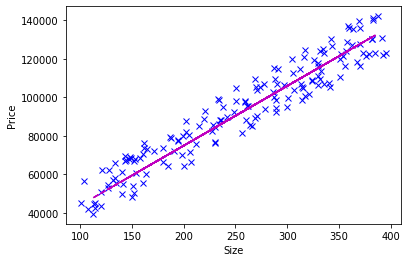

In [9]:
plt.plot(house_sizes, house_prices, "bx")
plt.plot(test_house_size, predictions_list *  train_price.std() + train_price.mean() , '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## Introducing Keras

## Solving linear regression w/ Keras

In [ ]:
import keras
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-10, 0, 2, 6, 12, 15], dtype=float)
y = X + 6
 
plt.plot(X, y, "bx") 
plt.show()

In [ ]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

In [ ]:
model.fit(X,y, batch_size=5, epochs=15, shuffle=False)

In [ ]:
pred = model.predict(X)

In [ ]:
plt.scatter(X, y, c='blue')
plt.plot(X, pred, color='g')
plt.show()

In [ ]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(house_sizes,house_prices, batch_size=1, epochs=15, shuffle=False)

In [ ]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(house_sizes_norm,house_prices_norm, batch_size=1, epochs=60, shuffle=False)

In [ ]:
pred = model.predict(house_sizes_norm)
plt.scatter(house_sizes_norm, house_prices_norm, c='blue')
plt.plot(house_sizes_norm, pred, color='g')
plt.show()

### Denormalizing